<a href="https://colab.research.google.com/github/K8rly/GoVote/blob/SarahDivakarla/GoVoteML_2016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sb
from pathlib import Path

## Import CSV

In [2]:
# from google.colab import files
# uploaded = files.upload()

Saving voter_final.csv to voter_final.csv


In [2]:
# 1. Create a DataFrame for the Presidential Election data. 
file_to_open = ("voter_final.csv")
voter_df = pd.read_csv(file_to_open,  encoding="ISO-8859-1")
voter_df.head()

,Voter_ID,Birth_Year,City,Zip_Code,Party,Registration_Date,2020_Primary_Election,2020_General_Election,2016_Primary_Election,2016_General_Election,Generational_Group
0,704844,1959,SEVEN HILLS,44131,NOPTY,1/1/1901,0,t,D,t,Boomers
1,1658758,1968,PARMA,44130,REP,9/9/1996,0,t,R,t,Generation X
2,2005536,1976,BROADVIEW HTS,44147,REP,3/8/2004,0,t,R,t,Generation X
3,2465762,1991,SOLON,44139,NOPTY,9/27/2010,0,f,0,f,Millennials
4,710633,1968,INDEPENDENCE,44131,REP,1/1/1901,0,t,R,t,Generation X


## Data Cleaning

In [3]:
#Replace True and False Values with 0 and 1
voter_df.replace(('f', 't'), (0, 1), inplace=True)

In [4]:
voter_df.shape

(719425, 11)

In [5]:
#Column Datatypes
voter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719425 entries, 0 to 719424
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Voter_ID               719425 non-null  int64 
 1   Birth_Year             719425 non-null  int64 
 2   City                   719425 non-null  object
 3   Zip_Code               719425 non-null  int64 
 4   Party                  719425 non-null  object
 5   Registration_Date      719425 non-null  object
 6   2020_Primary_Election  719425 non-null  object
 7   2020_General_Election  719425 non-null  int64 
 8   2016_Primary_Election  719425 non-null  object
 9   2016_General_Election  719425 non-null  int64 
 10  Generational_Group     719425 non-null  object
dtypes: int64(5), object(6)
memory usage: 60.4+ MB


In [6]:
# Set voter_id_org column as index
voter_df= voter_df.set_index('Voter_ID')

In [ ]:
# Hand categorical data
# code primary election data into integers
#D is Democrat, R is Republican, L is Libertarian, G is Green, 0, " ", X and N is non-party, issues only ballot


In [7]:
party={"D": 0, "R": 1, "L": 2, "0": 3, "N": 3, " ": 3, "G": 4, "X": 3}
voter_df['2016_Primary_Election'] = voter_df['2016_Primary_Election'].apply(lambda x:party[x])
voter_df['2020_Primary_Election'] = voter_df['2020_Primary_Election'].apply(lambda x:party[x])


In [8]:
voter_df.head()

,Birth_Year,City,Zip_Code,Party,Registration_Date,2020_Primary_Election,2020_General_Election,2016_Primary_Election,2016_General_Election,Generational_Group
Voter_ID,,,,,,,,,,
704844,1959,SEVEN HILLS,44131,NOPTY,1/1/1901,3,1,0,1,Boomers
1658758,1968,PARMA,44130,REP,9/9/1996,3,1,1,1,Generation X
2005536,1976,BROADVIEW HTS,44147,REP,3/8/2004,3,1,1,1,Generation X
2465762,1991,SOLON,44139,NOPTY,9/27/2010,3,0,3,0,Millennials
710633,1968,INDEPENDENCE,44131,REP,1/1/1901,3,1,1,1,Generation X


In [9]:
voter_df["Party"].unique()

array(['NOPTY', 'REP', 'DEM', 'GRE', 'LIB'], dtype=object)

In [10]:
# Handle Categorical "Party" columns
P_ID = {"DEM": 0, "REP": 1,"LIB": 2, "NOPTY": 3, "GRE": 4}
voter_df["Party"] = voter_df["Party"].apply(lambda x:P_ID[x])
voter_df.head()

,Birth_Year,City,Zip_Code,Party,Registration_Date,2020_Primary_Election,2020_General_Election,2016_Primary_Election,2016_General_Election,Generational_Group
Voter_ID,,,,,,,,,,
704844,1959,SEVEN HILLS,44131,3,1/1/1901,3,1,0,1,Boomers
1658758,1968,PARMA,44130,1,9/9/1996,3,1,1,1,Generation X
2005536,1976,BROADVIEW HTS,44147,1,3/8/2004,3,1,1,1,Generation X
2465762,1991,SOLON,44139,3,9/27/2010,3,0,3,0,Millennials
710633,1968,INDEPENDENCE,44131,1,1/1/1901,3,1,1,1,Generation X


In [11]:
group = {"Silent": 1,"Boomers": 2, "Generation X": 3, "Millennials": 4, "Generation Z": 5}
voter_df["Generational_Group"] = voter_df["Generational_Group"].apply(lambda x:group[x])
voter_df.head()

,Birth_Year,City,Zip_Code,Party,Registration_Date,2020_Primary_Election,2020_General_Election,2016_Primary_Election,2016_General_Election,Generational_Group
Voter_ID,,,,,,,,,,
704844,1959,SEVEN HILLS,44131,3,1/1/1901,3,1,0,1,2
1658758,1968,PARMA,44130,1,9/9/1996,3,1,1,1,3
2005536,1976,BROADVIEW HTS,44147,1,3/8/2004,3,1,1,1,3
2465762,1991,SOLON,44139,3,9/27/2010,3,0,3,0,4
710633,1968,INDEPENDENCE,44131,1,1/1/1901,3,1,1,1,3


In [12]:
voter_df["City"].unique()

array(['SEVEN HILLS', 'PARMA', 'BROADVIEW HTS', 'SOLON', 'INDEPENDENCE',
       'EUCLID', 'CLEVELAND HTS', 'GARFIELD HTS', 'CLEVELAND',
       'ROCKY RIVER', 'WESTLAKE', 'ORANGE', 'PEPPER PIKE', 'MAPLE HTS',
       'EAST CLEVELAND', 'BROOK PARK', 'NORTH ROYALTON',
       'WARRENSVILLE HTS', 'FAIRVIEW PARK', 'SOUTH EUCLID', 'BEREA',
       'MIDDLEBURG HTS', 'LYNDHURST', 'SHAKER HTS', 'BROOKLYN',
       'LAKEWOOD', 'OLMSTED FALLS', 'HIGHLAND HTS', 'GATES MILLS',
       'MAYFIELD HTS', 'PARMA HTS', 'BEACHWOOD', 'RICHMOND HTS',
       'BRECKSVILLE', 'UNIVERSITY HTS', 'BEDFORD', 'BEDFORD HTS',
       'OAKWOOD', 'STRONGSVILLE', 'BROOKLYN HTS', 'NEWBURGH HTS',
       'NORTH OLMSTED', 'OLMSTED TWP', 'WALTON HILLS', 'BAY VILLAGE',
       'CUYAHOGA HTS', 'VALLEY VIEW', 'MAYFIELD VILLAGE',
       'MORELAND HILLS', 'CHAGRIN FALLS', 'GLENWILLOW', 'HUNTING VALLEY',
       'BRATENAHL', 'BENTLEYVILLE', 'WOODMERE', 'HIGHLAND HILLS',
       'NORTH RANDALL', 'LINNDALE', 'CHAGRIN FALLS TWP'], dtype=object

In [13]:
# Code the cities to unique #s
cities = {'SEVEN HILLS': 1, 'PARMA': 2, 'BROADVIEW HTS': 3, 'SOLON': 4, 'INDEPENDENCE': 5,
       'EUCLID': 6, 'CLEVELAND HTS': 7, 'GARFIELD HTS': 8, 'CLEVELAND': 9,
       'ROCKY RIVER': 10, 'WESTLAKE': 11, 'ORANGE': 12, 'PEPPER PIKE':13, 'MAPLE HTS':14,
       'EAST CLEVELAND':15, 'BROOK PARK':16, 'NORTH ROYALTON':17, 'HIGHLAND HTS':18,
       'WARRENSVILLE HTS':19, 'FAIRVIEW PARK':20, 'SOUTH EUCLID':21, 'BEREA':22,
       'MIDDLEBURG HTS':23, 'LAKEWOOD':24, 'LYNDHURST':25, 'SHAKER HTS':25,
       'BROOKLYN':27, 'OLMSTED FALLS':28, 'UNIVERSITY HTS':29, 'GATES MILLS':30,
       'MAYFIELD HTS':31, 'PARMA HTS':32, 'BEACHWOOD':33, 'RICHMOND HTS':33,
       'BRECKSVILLE':34, 'BEDFORD':35, 'BEDFORD HTS':36, 'OAKWOOD':37,
       'NORTH OLMSTED':38, 'OLMSTED TWP':39, 'STRONGSVILLE':40, 'BROOKLYN HTS':41,
       'NEWBURGH HTS':42, 'BAY VILLAGE':43, 'MORELAND HILLS':44, 'WALTON HILLS':45,
       'CUYAHOGA HTS':46, 'VALLEY VIEW':47, 'MAYFIELD VILLAGE':48, 'BENTLEYVILLE':49,
       'GLENWILLOW':50, 'CHAGRIN FALLS':51, 'HUNTING VALLEY':52, 'BRATENAHL':53,
       'WOODMERE':54, 'HIGHLAND HILLS':55, 'NORTH RANDALL':56, 'LINNDALE': 57,
       'CHAGRIN FALLS TWP': 58}

voter_df["City"] = voter_df["City"].apply(lambda x:cities[x])


In [14]:
voter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 719425 entries, 704844 to 3017222
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Birth_Year             719425 non-null  int64 
 1   City                   719425 non-null  int64 
 2   Zip_Code               719425 non-null  int64 
 3   Party                  719425 non-null  int64 
 4   Registration_Date      719425 non-null  object
 5   2020_Primary_Election  719425 non-null  int64 
 6   2020_General_Election  719425 non-null  int64 
 7   2016_Primary_Election  719425 non-null  int64 
 8   2016_General_Election  719425 non-null  int64 
 9   Generational_Group     719425 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 60.4+ MB


In [15]:
voter_df['Registration_Date'] =  pd.to_datetime(voter_df['Registration_Date'], dayfirst=True)
voter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 719425 entries, 704844 to 3017222
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Birth_Year             719425 non-null  int64         
 1   City                   719425 non-null  int64         
 2   Zip_Code               719425 non-null  int64         
 3   Party                  719425 non-null  int64         
 4   Registration_Date      719425 non-null  datetime64[ns]
 5   2020_Primary_Election  719425 non-null  int64         
 6   2020_General_Election  719425 non-null  int64         
 7   2016_Primary_Election  719425 non-null  int64         
 8   2016_General_Election  719425 non-null  int64         
 9   Generational_Group     719425 non-null  int64         
dtypes: datetime64[ns](1), int64(9)
memory usage: 60.4 MB


In [16]:
voter_df.head()

,Birth_Year,City,Zip_Code,Party,Registration_Date,2020_Primary_Election,2020_General_Election,2016_Primary_Election,2016_General_Election,Generational_Group
Voter_ID,,,,,,,,,,
704844,1959,1,44131,3,1901-01-01,3,1,0,1,2
1658758,1968,2,44130,1,1996-09-09,3,1,1,1,3
2005536,1976,3,44147,1,2004-08-03,3,1,1,1,3
2465762,1991,4,44139,3,2010-09-27,3,0,3,0,4
710633,1968,5,44131,1,1901-01-01,3,1,1,1,3


In [17]:
corr_matrix = voter_df.corr()
corr_matrix['2020_General_Election'].sort_values(ascending=False)

2020_General_Election    1.000000
2016_General_Election    0.434672
City                     0.112302
Zip_Code                 0.054198
Generational_Group      -0.275442
Birth_Year              -0.285664
2020_Primary_Election   -0.309675
2016_Primary_Election   -0.337739
Party                   -0.392269
Name: 2020_General_Election, dtype: float64

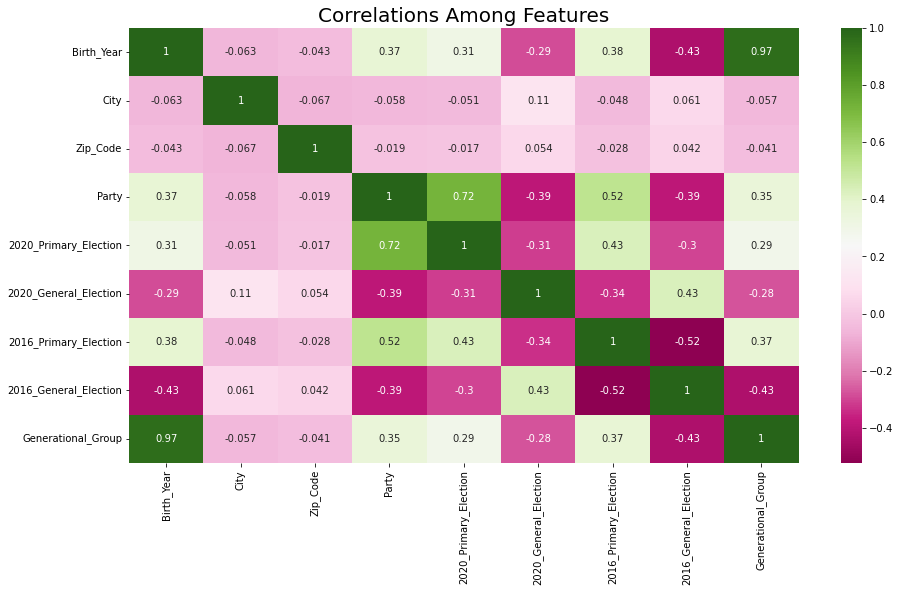

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplots(figsize = (15,8))
sb.heatmap(voter_df.corr(), annot=True,cmap="PiYG")
plt.title("Correlations Among Features", fontsize = 20);

In [19]:
voter_df['Birth_Year'].describe()

count    719425.000000
mean       1971.485668
std          18.784237
min        1928.000000
25%        1956.000000
50%        1972.000000
75%        1988.000000
max        2004.000000
Name: Birth_Year, dtype: float64

In [20]:
# Restrict to voters eligable to vote in 2016 and 2020 election (born 1998 or before)
voter_2016 = voter_df[voter_df['Birth_Year'] <= 1998]
voter_2016['Birth_Year'].describe()

count    677249.000000
mean       1969.662775
std          17.833038
min        1928.000000
25%        1956.000000
50%        1970.000000
75%        1986.000000
max        1998.000000
Name: Birth_Year, dtype: float64

In [21]:
voter_2016 = voter_2016[voter_2016['Registration_Date'] <= '2016-10-01']
voter_2016['Registration_Date'].describe()

count                  554377
unique                  11963
top       1901-01-01 00:00:00
freq                   123065
first     1800-01-01 00:00:00
last      2016-10-01 00:00:00
Name: Registration_Date, dtype: object

In [22]:
voter_2016cleaned = voter_2016.drop(['Registration_Date'], axis=1)
voter_2016cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554377 entries, 704844 to 276903
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   Birth_Year             554377 non-null  int64
 1   City                   554377 non-null  int64
 2   Zip_Code               554377 non-null  int64
 3   Party                  554377 non-null  int64
 4   2020_Primary_Election  554377 non-null  int64
 5   2020_General_Election  554377 non-null  int64
 6   2016_Primary_Election  554377 non-null  int64
 7   2016_General_Election  554377 non-null  int64
 8   Generational_Group     554377 non-null  int64
dtypes: int64(9)
memory usage: 42.3 MB


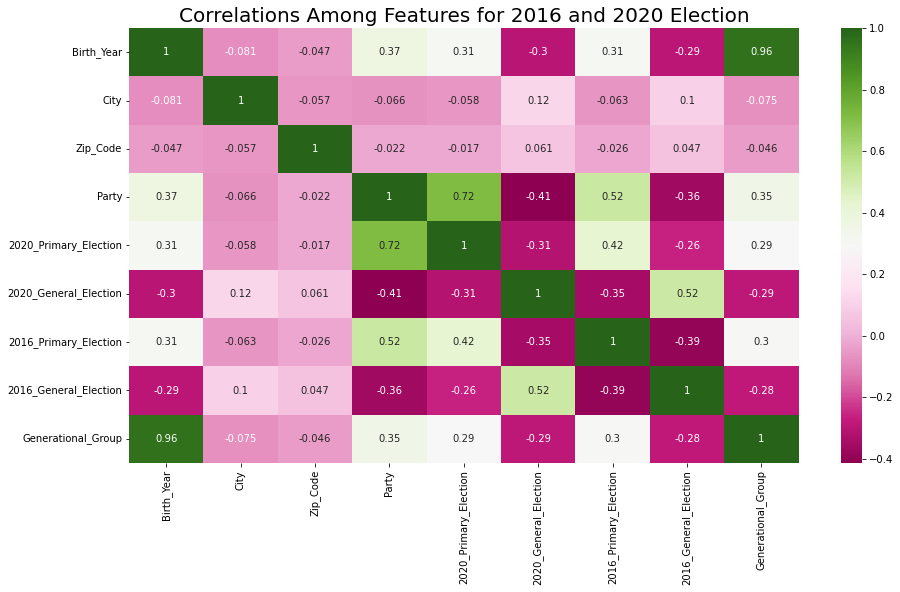

In [23]:
plt.subplots(figsize = (15,8))
sb.heatmap(voter_2016cleaned.corr(), annot=True,cmap="PiYG")
plt.title("Correlations Among Features for 2016 and 2020 Election", fontsize = 20);

# Machine Learning on 2016 and 2020 election - Voters Born 1928-1998

In [24]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from warnings import filterwarnings
filterwarnings(action='ignore')

In [25]:
classifier = GradientBoostingClassifier()

In [26]:
x = voter_2016cleaned.drop("2020_General_Election",axis=1)
y = voter_2016cleaned["2020_General_Election"]

In [27]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(x,y,test_size = 0.2 , random_state = 33)

classifier.fit(X_train,Y_train)


from sklearn.model_selection import cross_val_score

score = cross_val_score(classifier, X_train, Y_train,cv=5,
scoring="accuracy").mean()

In [28]:
score 


0.8382100599245377

In [30]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = classifier.predict(X_test)
report = classification_report(Y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.71      0.61      0.66     28194
           1       0.87      0.91      0.89     82682

    accuracy                           0.84    110876
   macro avg       0.79      0.76      0.78    110876
weighted avg       0.83      0.84      0.83    110876



In [76]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer

param_test1 = {'n_estimators':range(20,81,10)}
clf = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,
                                  min_samples_leaf=50,max_depth=8,max_features='sqrt', subsample=0.8,random_state=33), 
                       param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)
clf.fit(X_train, Y_train.values.ravel())


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=8,
                                                  max_features='sqrt',
                                                  min_samples_leaf=50,
                                                  min_samples_split=500,
                                                  random_state=33,
                                                  subsample=0.8),
             n_jobs=4, param_grid={'n_estimators': range(20, 81, 10)},
             scoring='roc_auc')

In [77]:
grid_scores = clf.cv_results_
grid_scores

{'mean_fit_time': array([24.63394957, 34.78171268, 47.14568014, 59.27721367, 71.43809476,
        80.72460322, 78.91655555]),
 'mean_score_time': array([0.38598452, 0.48704553, 0.60864048, 0.72607293, 0.85054345,
        0.95186243, 0.77884407]),
 'mean_test_score': array([0.88105295, 0.88176675, 0.88223466, 0.88268987, 0.8829689 ,
        0.88313859, 0.8832504 ]),
 'param_n_estimators': masked_array(data=[20, 30, 40, 50, 60, 70, 80],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 20},
  {'n_estimators': 30},
  {'n_estimators': 40},
  {'n_estimators': 50},
  {'n_estimators': 60},
  {'n_estimators': 70},
  {'n_estimators': 80}],
 'rank_test_score': array([7, 6, 5, 4, 3, 2, 1], dtype=int32),
 'split0_test_score': array([0.88128251, 0.88188668, 0.88226353, 0.88258788, 0.88285812,
        0.88302385, 0.88311841]),
 'split1_test_score': array([0.88134628, 0.88203496, 0.88254517, 0.8829645

In [ ]:
param_test2 = {'learning_rate': range(1, 6, 2)}
clf = GridSearchCV(estimator = GradientBoostingClassifier(n_estimators=80, min_samples_split=500,
                                  min_samples_leaf=50,max_depth=8,max_features='sqrt', subsample=0.8,random_state=33), 
                       param_grid = param_test2, scoring='roc_auc',n_jobs=4, cv=5)
clf.fit(X_train, Y_train.values.ravel())

In [82]:
grid_scores = clf.cv_results_
grid_scores

{'mean_fit_time': array([ 96.07599654, 100.02433534,  80.42911625]),
 'mean_score_time': array([0.99882364, 1.24105616, 0.82442503]),
 'mean_test_score': array([0.87799788, 0.5911286 , 0.55566325]),
 'param_learning_rate': masked_array(data=[1, 3, 5],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'learning_rate': 1}, {'learning_rate': 3}, {'learning_rate': 5}],
 'rank_test_score': array([1, 2, 3], dtype=int32),
 'split0_test_score': array([0.87846746, 0.49332747, 0.50604328]),
 'split1_test_score': array([0.87759452, 0.65468115, 0.67746284]),
 'split2_test_score': array([0.87634104, 0.67036794, 0.54885958]),
 'split3_test_score': array([0.87783465, 0.4929318 , 0.44412811]),
 'split4_test_score': array([0.87975171, 0.64433467, 0.60182242]),
 'std_fit_time': array([ 0.68668596,  2.78623797, 14.86724576]),
 'std_score_time': array([0.02672455, 0.11731341, 0.28536754]),
 'std_test_score': array([0.00111633, 0.08044421, 0.07989284

## Optimize Parameters

In [84]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
#creating Scoring parameter: 
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),'recall':make_scorer(recall_score)}

# A sample parameter

parameters = {
    "learning_rate": [0.5, 1],
    "max_depth":[3,5,10]
    }
#passing the scoring function in the GridSearchCV
clf = GridSearchCV(GradientBoostingClassifier(n_estimators=80, min_samples_split=500,
                                  min_samples_leaf=50,max_features='sqrt', subsample=0.8,random_state=33), 
                       param_grid = parameters, scoring='roc_auc',n_jobs=4, cv=5)

clf.fit(X_train, Y_train.values.ravel())
#converting the clf.cv_results to dataframe



GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_features='sqrt',
                                                  min_samples_leaf=50,
                                                  min_samples_split=500,
                                                  n_estimators=80,
                                                  random_state=33,
                                                  subsample=0.8),
             n_jobs=4,
             param_grid={'learning_rate': [0.5, 1], 'max_depth': [3, 5, 10]},
             scoring='roc_auc')

In [85]:
grid_scores = clf.cv_results_
grid_scores

{'mean_fit_time': array([ 46.21811314,  66.13710895, 118.71682496,  46.87083058,
         66.20505166, 100.94824061]),
 'mean_score_time': array([0.51737309, 0.71610479, 1.21534891, 0.50191631, 0.73229299,
        0.93822317]),
 'mean_test_score': array([0.88256841, 0.8828701 , 0.88000232, 0.88215093, 0.88128554,
        0.8731169 ]),
 'param_learning_rate': masked_array(data=[0.5, 0.5, 0.5, 1, 1, 1],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[3, 5, 10, 3, 5, 10],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'learning_rate': 0.5, 'max_depth': 3},
  {'learning_rate': 0.5, 'max_depth': 5},
  {'learning_rate': 0.5, 'max_depth': 10},
  {'learning_rate': 1, 'max_depth': 3},
  {'learning_rate': 1, 'max_depth': 5},
  {'learning_rate': 1, 'max_depth': 10}],
 'rank_test_score': array([2, 1, 5, 3, 4, 6], 

In [86]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
#creating Scoring parameter: 
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),'recall':make_scorer(recall_score)}



parameters = {
    "learning_rate": [0.1, 0.5],
    "max_depth":[5]
    }
#passing the scoring function in the GridSearchCV
clf = GridSearchCV(GradientBoostingClassifier(n_estimators=80, min_samples_split=500,
                                  min_samples_leaf=50,max_features='sqrt', subsample=0.8,random_state=33), 
                       param_grid = parameters, scoring='roc_auc',n_jobs=4, cv=5)
clf.fit(X_train, Y_train.values.ravel())
#converting the clf.cv_results to dataframe

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_features='sqrt',
                                                  min_samples_leaf=50,
                                                  min_samples_split=500,
                                                  n_estimators=80,
                                                  random_state=33,
                                                  subsample=0.8),
             n_jobs=4,
             param_grid={'learning_rate': [0.1, 0.5], 'max_depth': [5]},
             scoring='roc_auc')

In [87]:
grid_scores = clf.cv_results_
grid_scores

{'mean_fit_time': array([64.80125237, 50.64787717]),
 'mean_score_time': array([0.73014898, 0.53654699]),
 'mean_test_score': array([0.88228538, 0.8828701 ]),
 'param_learning_rate': masked_array(data=[0.1, 0.5],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[5, 5],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'learning_rate': 0.1, 'max_depth': 5},
  {'learning_rate': 0.5, 'max_depth': 5}],
 'rank_test_score': array([2, 1], dtype=int32),
 'split0_test_score': array([0.88227724, 0.88263607]),
 'split1_test_score': array([0.88241932, 0.8830343 ]),
 'split2_test_score': array([0.88035871, 0.8812195 ]),
 'split3_test_score': array([0.88194193, 0.88250851]),
 'split4_test_score': array([0.8844297 , 0.88495212]),
 'std_fit_time': array([ 0.16229949, 17.38667406]),
 'std_score_time': array([0.02503302, 0.20368637]),
 'std_test_score': array([0.0012997 , 0.00120